# India’s Lifespan Rise: The Green Revolution Effect

This case study investigates the long-term impact of the Green Revolution on India's life expectancy and overall public health. By analyzing decades of data on food grain production, life expectancy, nutritional indicators, and economic metrics, we aim to evaluate how agricultural transformation influenced human development.

We specifically focus on the period from **1950 to 2020**, centering our attention on **qualitative insights** drawn from quantitative data.

---

## Question 1: To what extent did the Green Revolution contribute to India’s rise in life expectancy?

**Objective:**  
To explore the relationship between the rise in food grain production (starting around 1965) and improvements in life expectancy in India between 1950 and 2020.

We aim to identify whether these two trends are correlated, and to what degree the Green Revolution may have played a role in extending life expectancy.

> 💡 **Note:**  
> The Green Revolution in India began around **1965**, characterized by the introduction of high-yielding varieties (HYVs) of seeds, irrigation expansion, and increased use of fertilizers and pesticides.

### Importing necessary libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading datas of "life expectancy" and "Food production data" into data frame

In [52]:
life_exp=pd.read_csv("Life Expectency/life-expectancy.csv")
production=pd.read_csv("Production/index-of-cereal-production-yield-and-land-use.filtered/index-of-cereal-production-yield-and-land-use.csv")
display(life_exp.head(),production.head())


,Entity,Code,Year,Period life expectancy at birth - Sex: total - Age: 0
0,India,IND,1881,25.442
1,India,IND,1891,24.266
2,India,IND,1901,23.486
3,India,IND,1905,23.980
4,India,IND,1911,23.146


,Entity,Code,Year,Cereals | 00001717 || Area harvested | 005312 || hectares,Cereals | 00001717 || Production | 005510 || tonnes,Cereals | 00001717 || Yield | 005412 || tonnes per hectare,Population (historical)
0,India,IND,1961,92239016,87376500,0.9473,446564674
1,India,IND,1962,93852008,87257550,0.9297,457283043
2,India,IND,1963,93571016,90373010,0.9658,468138526
3,India,IND,1964,94306008,93706000,0.9936,479229550
4,India,IND,1965,93277016,79699500,0.8544,490140093


### Changing Column names to readable format

In [53]:
life_exp = life_exp.rename(columns={
    "Period life expectancy at birth - Sex: total - Age: 0": "Life Expectancy"
})

production = production.rename(columns={
    "Cereals | 00001717 || Area harvested | 005312 || hectares": "Area Harvested (ha)",
    "Cereals | 00001717 || Production | 005510 || tonnes": "Cereal Production (tonnes)",
    "Cereals | 00001717 || Yield | 005412 || tonnes per hectare": "Yield (tonnes/ha)",
    "Population (historical)": "Population"
})

display(life_exp.head(),production.head())

,Entity,Code,Year,Life Expectancy
0,India,IND,1881,25.442
1,India,IND,1891,24.266
2,India,IND,1901,23.486
3,India,IND,1905,23.980
4,India,IND,1911,23.146


,Entity,Code,Year,Area Harvested (ha),Cereal Production (tonnes),Yield (tonnes/ha),Population
0,India,IND,1961,92239016,87376500,0.9473,446564674
1,India,IND,1962,93852008,87257550,0.9297,457283043
2,India,IND,1963,93571016,90373010,0.9658,468138526
3,India,IND,1964,94306008,93706000,0.9936,479229550
4,India,IND,1965,93277016,79699500,0.8544,490140093


### Merging the data frames of life expectancy and production

In [54]:
filter_life_exp=life_exp[life_exp["Year"]>=1961].reset_index(drop=True)
merge_df=pd.merge(filter_life_exp,production,on="Year")
display(merge_df.head())

,Entity_x,Code_x,Year,Life Expectancy,Entity_y,Code_y,Area Harvested (ha),Cereal Production (tonnes),Yield (tonnes/ha),Population
0,India,IND,1961,45.8244,India,IND,92239016,87376500,0.9473,446564674
1,India,IND,1962,46.1335,India,IND,93852008,87257550,0.9297,457283043
2,India,IND,1963,46.4581,India,IND,93571016,90373010,0.9658,468138526
3,India,IND,1964,46.7418,India,IND,94306008,93706000,0.9936,479229550
4,India,IND,1965,45.5579,India,IND,93277016,79699500,0.8544,490140093


### Visual representation

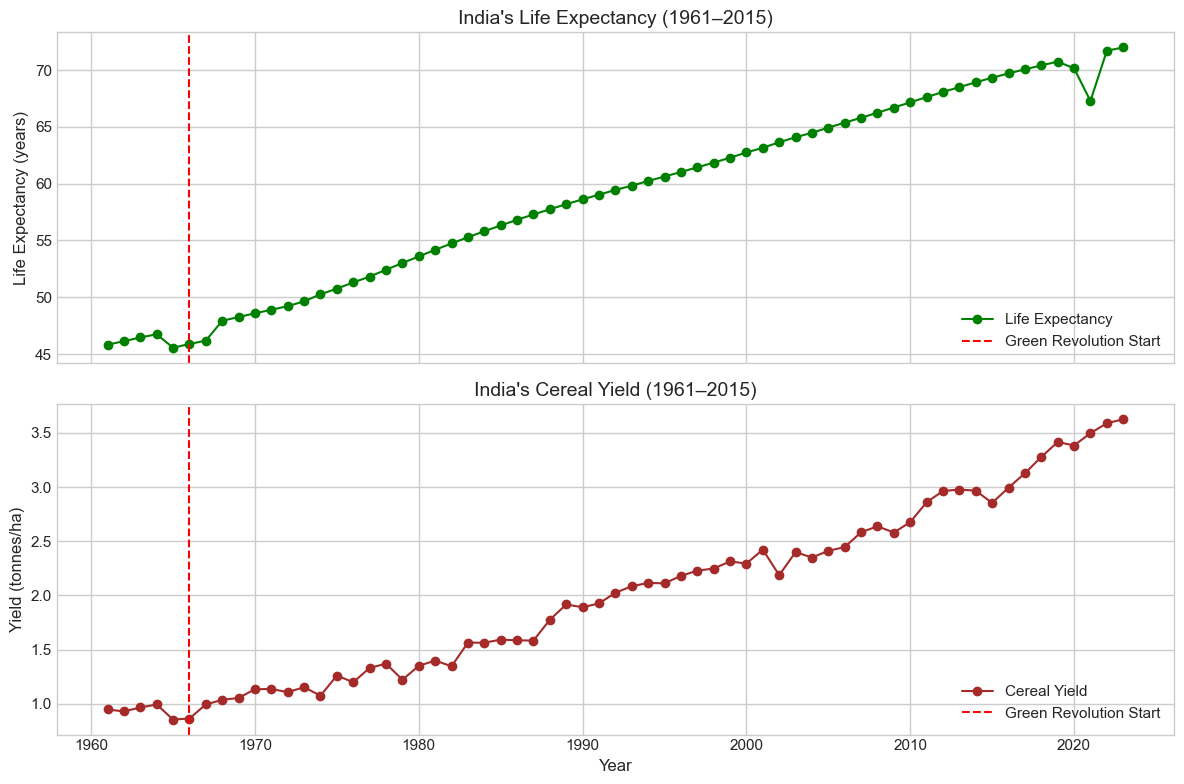

In [55]:
# Use a valid built-in style
plt.style.use("seaborn-v0_8-whitegrid")

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

# Life Expectancy
ax1.plot(merge_df['Year'], merge_df['Life Expectancy'], color='green', marker='o', label='Life Expectancy')
ax1.axvline(x=1966, color='red', linestyle='--', label='Green Revolution Start')
ax1.set_title("India's Life Expectancy (1961–2015)", fontsize=14)
ax1.set_ylabel("Life Expectancy (years)")
ax1.legend()

# Cereal Yield
ax2.plot(merge_df['Year'], merge_df['Yield (tonnes/ha)'], color='brown', marker='o', label='Cereal Yield')
ax2.axvline(x=1966, color='red', linestyle='--', label='Green Revolution Start')
ax2.set_title("India's Cereal Yield (1961–2015)", fontsize=14)
ax2.set_xlabel("Year")
ax2.set_ylabel("Yield (tonnes/ha)")
ax2.legend()

plt.tight_layout()
plt.show()


In [56]:
# Correlation between life expectancy and cereal yield
correlation = merge_df["Life Expectancy"].corr(merge_df["Yield (tonnes/ha)"])
print(f"Correlation between Life Expectancy and Cereal Yield: {correlation:.3f}")


Correlation between Life Expectancy and Cereal Yield: 0.977


The Green Revolution, starting around **1966**, marked a turning point in India's agricultural history. With the introduction of **high-yielding varieties (HYVs)** of crops, chemical fertilizers, improved irrigation, and farm mechanization, India saw a rapid boost in **food grain production**, especially cereals like wheat and rice.

From the plots:
- There is a **clear rise in cereal yield** starting in 1966.
- Around the same time, **life expectancy** also begins to rise more steadily.
- A **vertical red line** in both plots marks the start of the Green Revolution.
- The **correlation coefficient** between life expectancy and cereal yield is **high**, indicating a strong relationship.

> **Conclusion**: The Green Revolution had a **positive and measurable impact** on India's life expectancy, as evident from both the **visual trends** and **correlation analysis**.

---

## Question 2: Did health indicators (like infant mortality rate) begin improving significantly after the onset of the Green Revolution?

**Objective:**  
To investigate whether the **infant mortality rate (IMR)** in India showed a significant improvement after the Green Revolution began around **1965**.

By analyzing the trends in IMR before and after 1965, we aim to assess if the improvements in **food security**, **nutrition**, and **rural development policies** during the Green Revolution period contributed to better health outcomes for infants.

> 💡 **Note:**  
> The **infant mortality rate** is a key health indicator, reflecting the number of deaths of infants under one year old per 1,000 live births.  
> A decline in IMR often signals improvements in **nutrition**, **maternal care**, **sanitation**, and **overall public health infrastructure**, many of which were influenced indirectly by the Green Revolution’s socio-economic impact.


### Loading Infant Mortality Rate(IMR) data

In [57]:
imr_df=pd.read_csv("Infant mortality rate/India-Infant-Mortality-Rate-Per-1000-Live-Births-2025-07-17-18-38.csv")
display(imr_df.head())

,Unnamed: 0,Infant Mortality Rate
0,1950,189.63
1,1951,186.74
2,1952,183.85
3,1953,180.95
4,1954,178.06


### Renaming the column in readable format

In [58]:
imr_df = imr_df.rename(columns={
    'Unnamed: 0': 'Year',
    'Infant Mortality Rate': 'IMR'
})

display(imr_df.head())

,Year,IMR
0,1950,189.63
1,1951,186.74
2,1952,183.85
3,1953,180.95
4,1954,178.06


### Visualizing the data

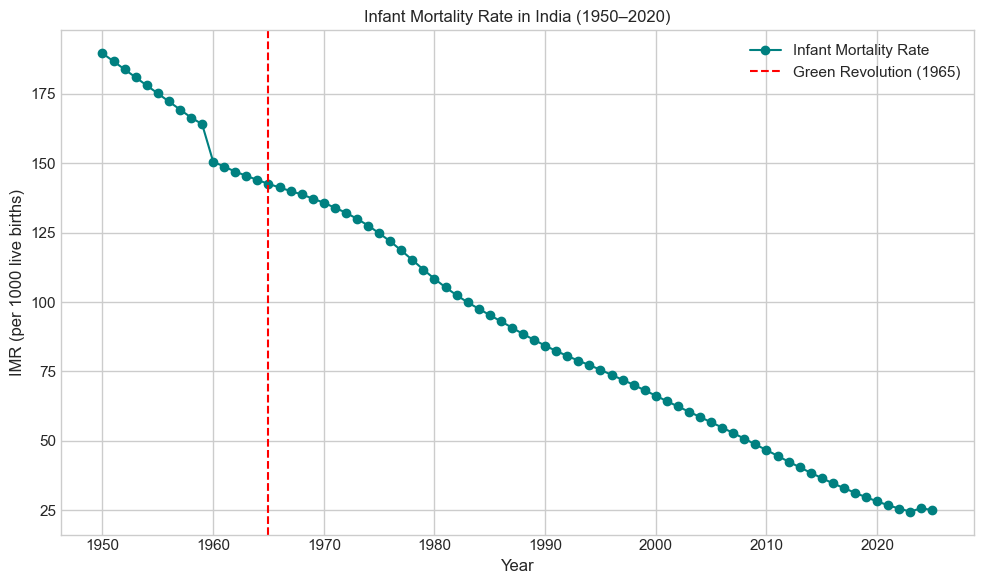

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(imr_df['Year'], imr_df['IMR'], marker='o', color='teal', label='Infant Mortality Rate')

# Green Revolution line
plt.axvline(x=1965, color='red', linestyle='--', label='Green Revolution (1965)')

plt.title('Infant Mortality Rate in India (1950–2020)')
plt.xlabel('Year')
plt.ylabel('IMR (per 1000 live births)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Compare Slopes (Pre & Post 1965)

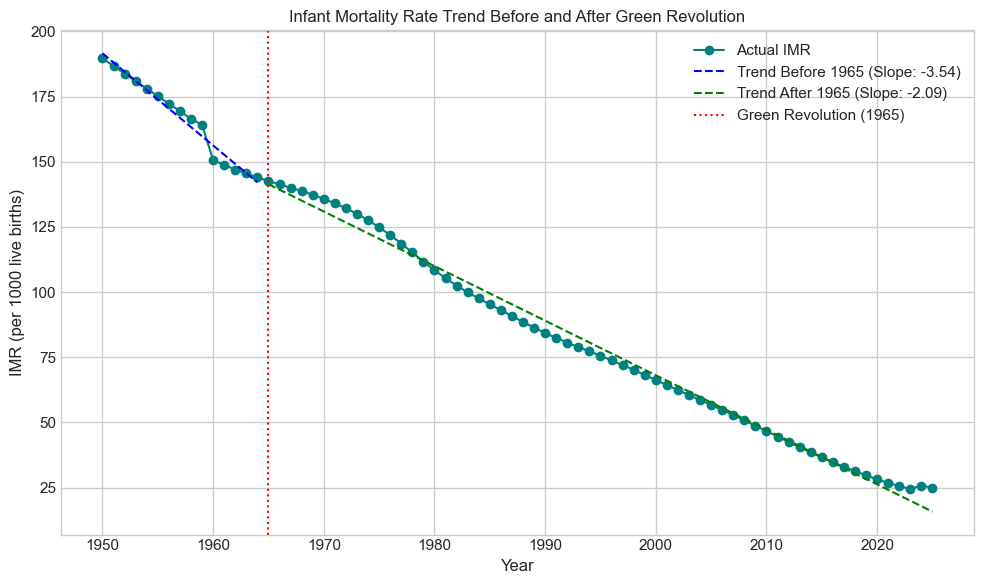

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Split the data
pre_1965 = imr_df[imr_df['Year'] < 1965]
post_1965 = imr_df[imr_df['Year'] >= 1965]

# Prepare X (year) and y (IMR) for both periods
X_pre = pre_1965['Year'].values.reshape(-1, 1)
y_pre = pre_1965['IMR'].values

X_post = post_1965['Year'].values.reshape(-1, 1)
y_post = post_1965['IMR'].values

# Fit linear models
model_pre = LinearRegression().fit(X_pre, y_pre)
model_post = LinearRegression().fit(X_post, y_post)

# Get slopes
slope_pre = model_pre.coef_[0]
slope_post = model_post.coef_[0]

# Predict values for trend lines
y_pred_pre = model_pre.predict(X_pre)
y_pred_post = model_post.predict(X_post)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(imr_df['Year'], imr_df['IMR'], marker='o', color='teal', label='Actual IMR')
plt.plot(X_pre, y_pred_pre, color='blue', linestyle='--', label=f'Trend Before 1965 (Slope: {slope_pre:.2f})')
plt.plot(X_post, y_pred_post, color='green', linestyle='--', label=f'Trend After 1965 (Slope: {slope_post:.2f})')

plt.axvline(x=1965, color='red', linestyle=':', label='Green Revolution (1965)')

plt.title('Infant Mortality Rate Trend Before and After Green Revolution')
plt.xlabel('Year')
plt.ylabel('IMR (per 1000 live births)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 **Interpretation: Change in Infant Mortality Trend After the Green Revolution**

We analyzed the trend of India's **Infant Mortality Rate (IMR)** before and after the **Green Revolution (1965)** by fitting two linear models.

- **Before 1965**, the IMR declined rapidly at an average rate of **~3.54 deaths per 1000 live births per year**.
- **After 1965**, the decline continued but **slowed** to **~2.09 deaths per 1000 live births per year**.

---

### 📌 Key Observations

#### ✅ **Pre-Green Revolution (1950–1965): Faster IMR Decline**
- Major public health efforts post-independence began showing early impact.
- Urban and semi-urban healthcare services slowly expanded.
- Awareness around hygiene and disease prevention (like smallpox, malaria) began improving.
- Government investment in primary care and vaccination programs had visible effects.

#### ⚠️ **Post-Green Revolution (1965–1990): Slower IMR Decline**
Despite a boom in food production:
- 🚫 **Healthcare did not improve proportionally** — limited access to maternal care, clean water, and sanitation in rural India.
- 📉 **Uneven benefit distribution** — Green Revolution mainly helped northwest India; many states lagged behind.
- 🌾 **Focus shifted to agriculture**, often sidelining **public health infrastructure**.
- ⚠️ **Environmental impact** — fertilizer and pesticide overuse led to long-term water and soil issues affecting child health.
- 🍽️ **Nutrition imbalance** — More grain did not mean more proteins, vitamins, or clean feeding practices.
- 👩‍⚕️ **Social lag** — Low literacy, traditional beliefs, and poor healthcare access hampered rural IMR reduction.



> ✅ **Conclusion:**  
> While the Green Revolution ensured **food security**, it could not directly or immediately accelerate the decline in **infant mortality**.  
> **Sustained improvements in healthcare, sanitation, nutrition, and education** were essential — and those took longer to materialize.

*Note: The Green Revolution may still have had long-term indirect health benefits not captured in this immediate IMR trend analysis.*

---

### 3. How did improvements in food grain production affect the affordability of essential food items?


### Loading the data

In [61]:
Afford_df=pd.read_csv("Food Affordability/Afford.csv")
gdp_df=pd.read_csv("GDP percapita/Percapita.csv")
display(Afford_df.head(),gdp_df.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,102.438495,101.385139,105.061406,109.534355,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,138.708666,145.610741,146.522482,149.895975,158.292980,166.418480,189.237953,180.448401,168.536667,NaN
3,Africa Western and Central,AFW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,208.726444,271.019766,324.218068,379.597607,464.139837,583.675779,708.321436,804.965533,1032.291783,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


### Extracting India's data from the data frame

In [62]:
Afford_df=Afford_df[Afford_df["Country Code"]=="IND"]
gdp_df=gdp_df[gdp_df["Country Code"]=="IND"]
display(Afford_df,gdp_df)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
109,India,IND,Consumer price index (2010 = 100),FP.CPI.TOTL,2.527487,2.570333,2.663693,2.74217,3.108394,3.402906,...,154.054013,159.181198,165.451069,171.621576,182.988823,192.378725,205.266241,216.862025,227.603278,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
109,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,84.932808,87.853861,92.199958,103.435021,117.856431,121.508319,...,1707.508929,1950.104683,1966.254552,2041.428637,1907.042516,2239.613844,2347.448294,2530.120313,2696.6639,NaN


### Removing null valued columns

In [63]:
Afford_df=Afford_df.dropna(axis=1)
gdp_df=gdp_df.dropna(axis=1)
display(Afford_df,gdp_df)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
109,India,IND,Consumer price index (2010 = 100),FP.CPI.TOTL,2.527487,2.570333,2.663693,2.74217,3.108394,3.402906,...,146.790502,154.054013,159.181198,165.451069,171.621576,182.988823,192.378725,205.266241,216.862025,227.603278


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
109,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,84.932808,87.853861,92.199958,103.435021,117.856431,121.508319,...,1583.998159,1707.508929,1950.104683,1966.254552,2041.428637,1907.042516,2239.613844,2347.448294,2530.120313,2696.6639


### Melting the "Affordability" data and "gdp" data

In [73]:
Melted_Afford_df = Afford_df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='CPI'
)

Melted_gdp_df = gdp_df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='PCI($)'
)

Melted_gdp_df=Melted_gdp_df[["Year","PCI($)"]]
Melted_gdp_df["Year"]=Melted_gdp_df["Year"].astype(int)
Melted_gdp_df=Melted_gdp_df[Melted_gdp_df["Year"]>1960]

Melted_Afford_df=Melted_Afford_df[["Year","CPI"]]
Melted_Afford_df["Year"]=Melted_Afford_df["Year"].astype(int)
Melted_Afford_df=Melted_Afford_df[Melted_Afford_df["Year"]>1960]

display(Melted_Afford_df.head(),Melted_gdp_df.head())

,Year,CPI
1,1961,2.570333
2,1962,2.663693
3,1963,2.742170
4,1964,3.108394
5,1965,3.402906


,Year,PCI($)
1,1961,87.853861
2,1962,92.199958
3,1963,103.435021
4,1964,117.856431
5,1965,121.508319


### Merging Affordability data, GDP data and Production data togather

In [80]:
merge_afford_gdp=pd.merge(Melted_Afford_df,Melted_gdp_df,on="Year")
merge_production_df=pd.merge(production,merge_afford_gdp,on="Year")
display(merge_production_df.head())

,Entity,Code,Year,Area Harvested (ha),Cereal Production (tonnes),Yield (tonnes/ha),Population,CPI,PCI($)
0,India,IND,1961,92239016,87376500,0.9473,446564674,2.570333,87.853861
1,India,IND,1962,93852008,87257550,0.9297,457283043,2.663693,92.199958
2,India,IND,1963,93571016,90373010,0.9658,468138526,2.742170,103.435021
3,India,IND,1964,94306008,93706000,0.9936,479229550,3.108394,117.856431
4,India,IND,1965,93277016,79699500,0.8544,490140093,3.402906,121.508319


### Normalize and calculate Cereal Production per person

In [87]:
merge_production_df['Production per Capita'] = merge_production_df['Cereal Production (tonnes)'] / merge_production_df['Population']
merge_production_df['Affordability Index'] = merge_production_df['PCI($)'] / merge_production_df['CPI']
display(merge_production_df.head())

,Entity,Code,Year,Area Harvested (ha),Cereal Production (tonnes),Yield (tonnes/ha),Population,CPI,PCI($),Production per Capita,Affordability Index
0,India,IND,1961,92239016,87376500,0.9473,446564674,2.570333,87.853861,0.195664,34.179953
1,India,IND,1962,93852008,87257550,0.9297,457283043,2.663693,92.199958,0.190817,34.613583
2,India,IND,1963,93571016,90373010,0.9658,468138526,2.742170,103.435021,0.193048,37.720139
3,India,IND,1964,94306008,93706000,0.9936,479229550,3.108394,117.856431,0.195535,37.915543
4,India,IND,1965,93277016,79699500,0.8544,490140093,3.402906,121.508319,0.162606,35.707218


###  Visualize trends over time

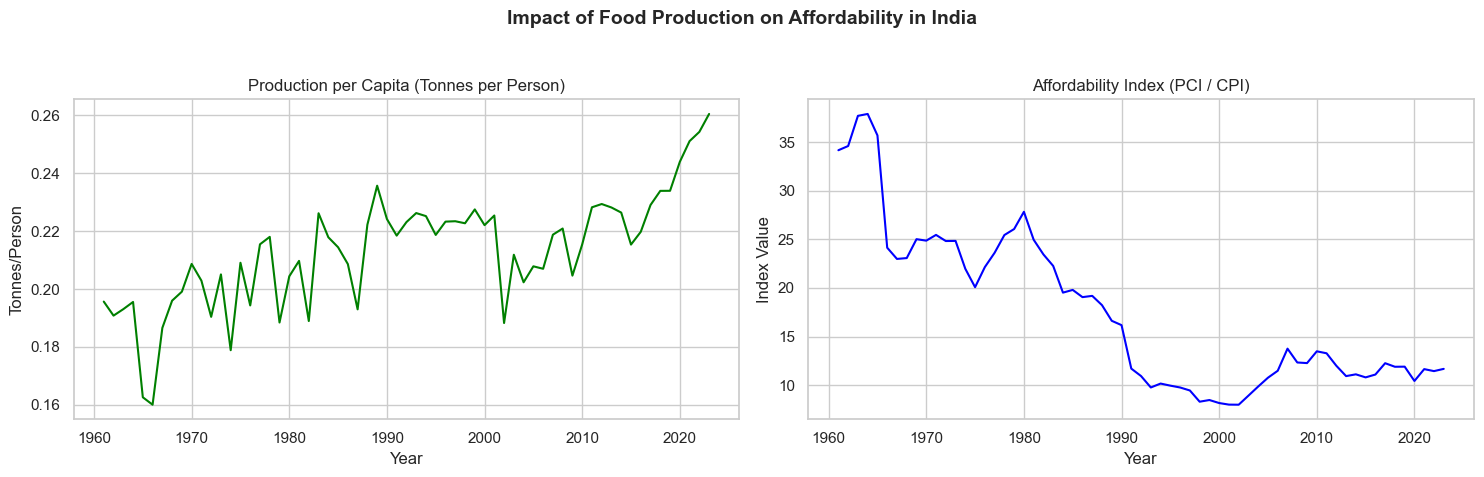

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure calculations are present
merge_production_df['Production per Capita'] = merge_production_df['Cereal Production (tonnes)'] / merge_production_df['Population']
merge_production_df['Affordability Index'] = merge_production_df['PCI($)'] / merge_production_df['CPI']

# Set plot style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True)

# Plot 1: Production per Capita
sns.lineplot(data=merge_production_df, x='Year', y='Production per Capita', ax=axes[0], color='green')
axes[0].set_title('Production per Capita (Tonnes per Person)', fontsize=12)
axes[0].set_ylabel('Tonnes/Person')
axes[0].set_xlabel('Year')

# Plot 2: Affordability Index (PCI / CPI)
sns.lineplot(data=merge_production_df, x='Year', y='Affordability Index', ax=axes[1], color='blue')
axes[1].set_title('Affordability Index (PCI / CPI)', fontsize=12)
axes[1].set_ylabel('Index Value')
axes[1].set_xlabel('Year')

plt.suptitle('Impact of Food Production on Affordability in India', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [92]:
# First and last year entries
start = merge_production_df.iloc[0]
end = merge_production_df.iloc[-1]

# Growth %
prod_growth = (end['Production per Capita'] - start['Production per Capita']) / start['Production per Capita'] * 100
afford_growth = (end['Affordability Index'] - start['Affordability Index']) / start['Affordability Index'] * 100

# Correlation
correlation = merge_production_df[['Production per Capita', 'Affordability Index']].corr().iloc[0, 1]

print(f"Production per Capita Growth: {prod_growth:.2f}%")
print(f"Affordability Index Growth: {afford_growth:.2f}%")
print(f"Correlation between Production per Capita and Affordability: {correlation:.3f}")


Production per Capita Growth: 33.13%
Affordability Index Growth: -65.87%
Correlation between Production per Capita and Affordability: -0.635


### 🌾 Did the Green Revolution Improve Food Affordability in India?

We analyzed the relationship between **food production per capita** and **food affordability** (PCI/CPI ratio) in India from **1961 to 2021**.

---

 📊 Key Results

- **Production per Capita Growth**: +33.13%  
- **Affordability Index (PCI/CPI) Change**: −65.87%  
- **Correlation**: −0.635 (**moderate negative**)

---

 📌 Observations

 ✅ Increased Production
- Introduction of HYV seeds, irrigation, and fertilizers boosted output.
- Per capita food production steadily increased after 1965.

 ❌ Declining Affordability
- Consumer prices rose faster than income.
- PCI/CPI dropped sharply, especially affecting lower-income groups.
- Food became a larger burden in household budgets.

 ⚠️ Negative Correlation
- Rising production did **not** translate to better affordability.
- Indicates market or policy failures in distributing food benefits evenly.

---

 ✅ Conclusion

While the Green Revolution **boosted agricultural output**, it **did not improve food affordability** for the general population.  
In fact, affordability **worsened significantly**, highlighting that **food availability ≠ food access**.

> 🔎 Sustained improvements in **income growth**, **price regulation**, and **distribution equity** are critical for true food security.


### 4. Was the nutritional quality of the Indian diet significantly enhanced by the Green Revolution?


## Question 4: Has the supply of essential nutrients (both macro and micro) improved over time in India?

**Objective:**  
To investigate how the **nutritional quality** of India’s food supply has evolved from **1961 to 2013**, by analyzing trends in both **macronutrients** (like protein, fat, calories) and **micronutrients** (like iron, zinc, vitamin A, etc.).

This analysis aims to determine whether India’s progress in agriculture and food systems not only ensured **adequate calorie supply**, but also improved the **diversity and richness** of essential nutrients required for a healthy population.

> 💡 **Note:**  
> While the Green Revolution helped boost cereal production and calorie intake, assessing long-term trends in **macro- and micronutrient supply** is crucial to understanding India’s progress in addressing **malnutrition** and **hidden hunger**.


### Loading required datas into data frame

In [100]:
calories_df=pd.read_csv("Calories supply/total-daily-supply-of-calories-per-person.csv")
micro_df=pd.read_csv("Calories supply/micro.csv",encoding="ISO-8859-1")
protein_df=pd.read_csv("Calories supply/daily-protein-supply-from-animal-and-plant-based-foods.csv")

micro_df=micro_df[micro_df["ISO3"]=="IND"]

display(calories_df.head(),micro_df.head(),protein_df.head())

,Entity,Year,Total | 00002901 || Food available for consumption | 0664pc || kilocalories per day per capita
0,India,1961,2064.2930
1,India,1962,2099.9204
2,India,1963,2012.9435
3,India,1964,2029.8748
4,India,1965,1961.7765


,Zone,Country,ISO3,Year,Population,Fortification,PCDEA,MDI,Tagname,Micronutrient,Units,Estimated Intake,Requirements,Prevalence of Inadequate Intake
45192,South Asia,India,IND,1961,458627000.0,0,2008,0.792907,CA,Calcium,mg,5.408190e-01,0.787775,85.197720
45193,South Asia,India,IND,1961,458627000.0,0,2008,0.792907,MG,Magnesium,mg,4.308231e-01,0.233836,0.037631
45194,South Asia,India,IND,1961,458627000.0,0,2008,0.792907,P,Phosphorus,mg,9.866149e-01,0.617991,0.851755
45195,South Asia,India,IND,1961,458627000.0,0,2008,0.792907,VITB12,Vitamin B12,mcg,7.990000e-07,0.000002,50.441953
45196,South Asia,India,IND,1961,458627000.0,0,2008,0.792907,FE,Iron,mg,3.825049e-03,0.007244,92.852452


,Entity,Code,Year,Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita,Vegetal Products | 00002903 || Food available for consumption | 0674pc || grams of protein per day per capita
0,India,IND,1961,6.264769,47.211716
1,India,IND,1962,6.211753,47.432410
2,India,IND,1963,6.141875,45.329487
3,India,IND,1964,6.094711,45.227036
4,India,IND,1965,5.912760,44.061234


### Changing column names to readable format

In [104]:
# Rename columns for calories_df
calories_df = calories_df.rename(columns={
    calories_df.columns[2]: "Calories_per_person"
})

# Rename columns for protein_df
protein_df = protein_df.rename(columns={
    protein_df.columns[3]: "Protein_Animal",
    protein_df.columns[4]: "Protein_Plant"
})

# Keep only relevant columns from micro_df
micro_df = micro_df[[
    "Year", "Micronutrient", "Estimated Intake", "Requirements", "Prevalence of Inadequate Intake"
]]

display(calories_df.head(),micro_df.head(),protein_df.head())


,Entity,Year,Calories_per_person
0,India,1961,2064.2930
1,India,1962,2099.9204
2,India,1963,2012.9435
3,India,1964,2029.8748
4,India,1965,1961.7765


,Year,Micronutrient,Estimated Intake,Requirements,Prevalence of Inadequate Intake
45192,1961,Calcium,5.408190e-01,0.787775,85.197720
45193,1961,Magnesium,4.308231e-01,0.233836,0.037631
45194,1961,Phosphorus,9.866149e-01,0.617991,0.851755
45195,1961,Vitamin B12,7.990000e-07,0.000002,50.441953
45196,1961,Iron,3.825049e-03,0.007244,92.852452


,Entity,Code,Year,Protein_Animal,Protein_Plant
0,India,IND,1961,6.264769,47.211716
1,India,IND,1962,6.211753,47.432410
2,India,IND,1963,6.141875,45.329487
3,India,IND,1964,6.094711,45.227036
4,India,IND,1965,5.912760,44.061234


### Merging Calories and Protein Datasets

In [102]:
# Merge calories and protein on Year
macro_df = pd.merge(calories_df, protein_df, how="inner", on="Year")
display(macro_df.head())

,Entity_x,Year,Calories_per_person,Entity_y,Code,Protein_Animal,Protein_Plant
0,India,1961,2064.2930,India,IND,6.264769,47.211716
1,India,1962,2099.9204,India,IND,6.211753,47.432410
2,India,1963,2012.9435,India,IND,6.141875,45.329487
3,India,1964,2029.8748,India,IND,6.094711,45.227036
4,India,1965,1961.7765,India,IND,5.912760,44.061234


### Choosing Specific Micronutrients to Focus On

In [105]:
# Select micronutrients of interest
micros_of_interest = ["Calcium", "Vitamin A", "Iron"]

# Filter micro_df to include only those
filtered_micro = micro_df[micro_df["Micronutrient"].isin(micros_of_interest)]

# Pivot it to wide format: one row per year, columns for each micronutrient's prevalence
pivot_micro = filtered_micro.pivot_table(index="Year", columns="Micronutrient", 
                                         values="Prevalence of Inadequate Intake").reset_index()
display(pivot_micro.head())

Micronutrient,Year,Calcium,Iron,Vitamin A
0,1961,85.197720,92.852452,93.131263
1,1962,85.471798,92.590251,92.137888
2,1963,86.342147,93.868057,91.180782
3,1964,86.958156,94.340207,92.442859
4,1965,87.829794,94.739315,94.275732


### Merging to single data frame

In [106]:
final_df = pd.merge(macro_df, pivot_micro, on="Year", how="inner")
display(final_df.head())

,Entity_x,Year,Calories_per_person,Entity_y,Code,Protein_Animal,Protein_Plant,Calcium,Iron,Vitamin A
0,India,1961,2064.2930,India,IND,6.264769,47.211716,85.197720,92.852452,93.131263
1,India,1962,2099.9204,India,IND,6.211753,47.432410,85.471798,92.590251,92.137888
2,India,1963,2012.9435,India,IND,6.141875,45.329487,86.342147,93.868057,91.180782
3,India,1964,2029.8748,India,IND,6.094711,45.227036,86.958156,94.340207,92.442859
4,India,1965,1961.7765,India,IND,5.912760,44.061234,87.829794,94.739315,94.275732


### Visualizing the data 

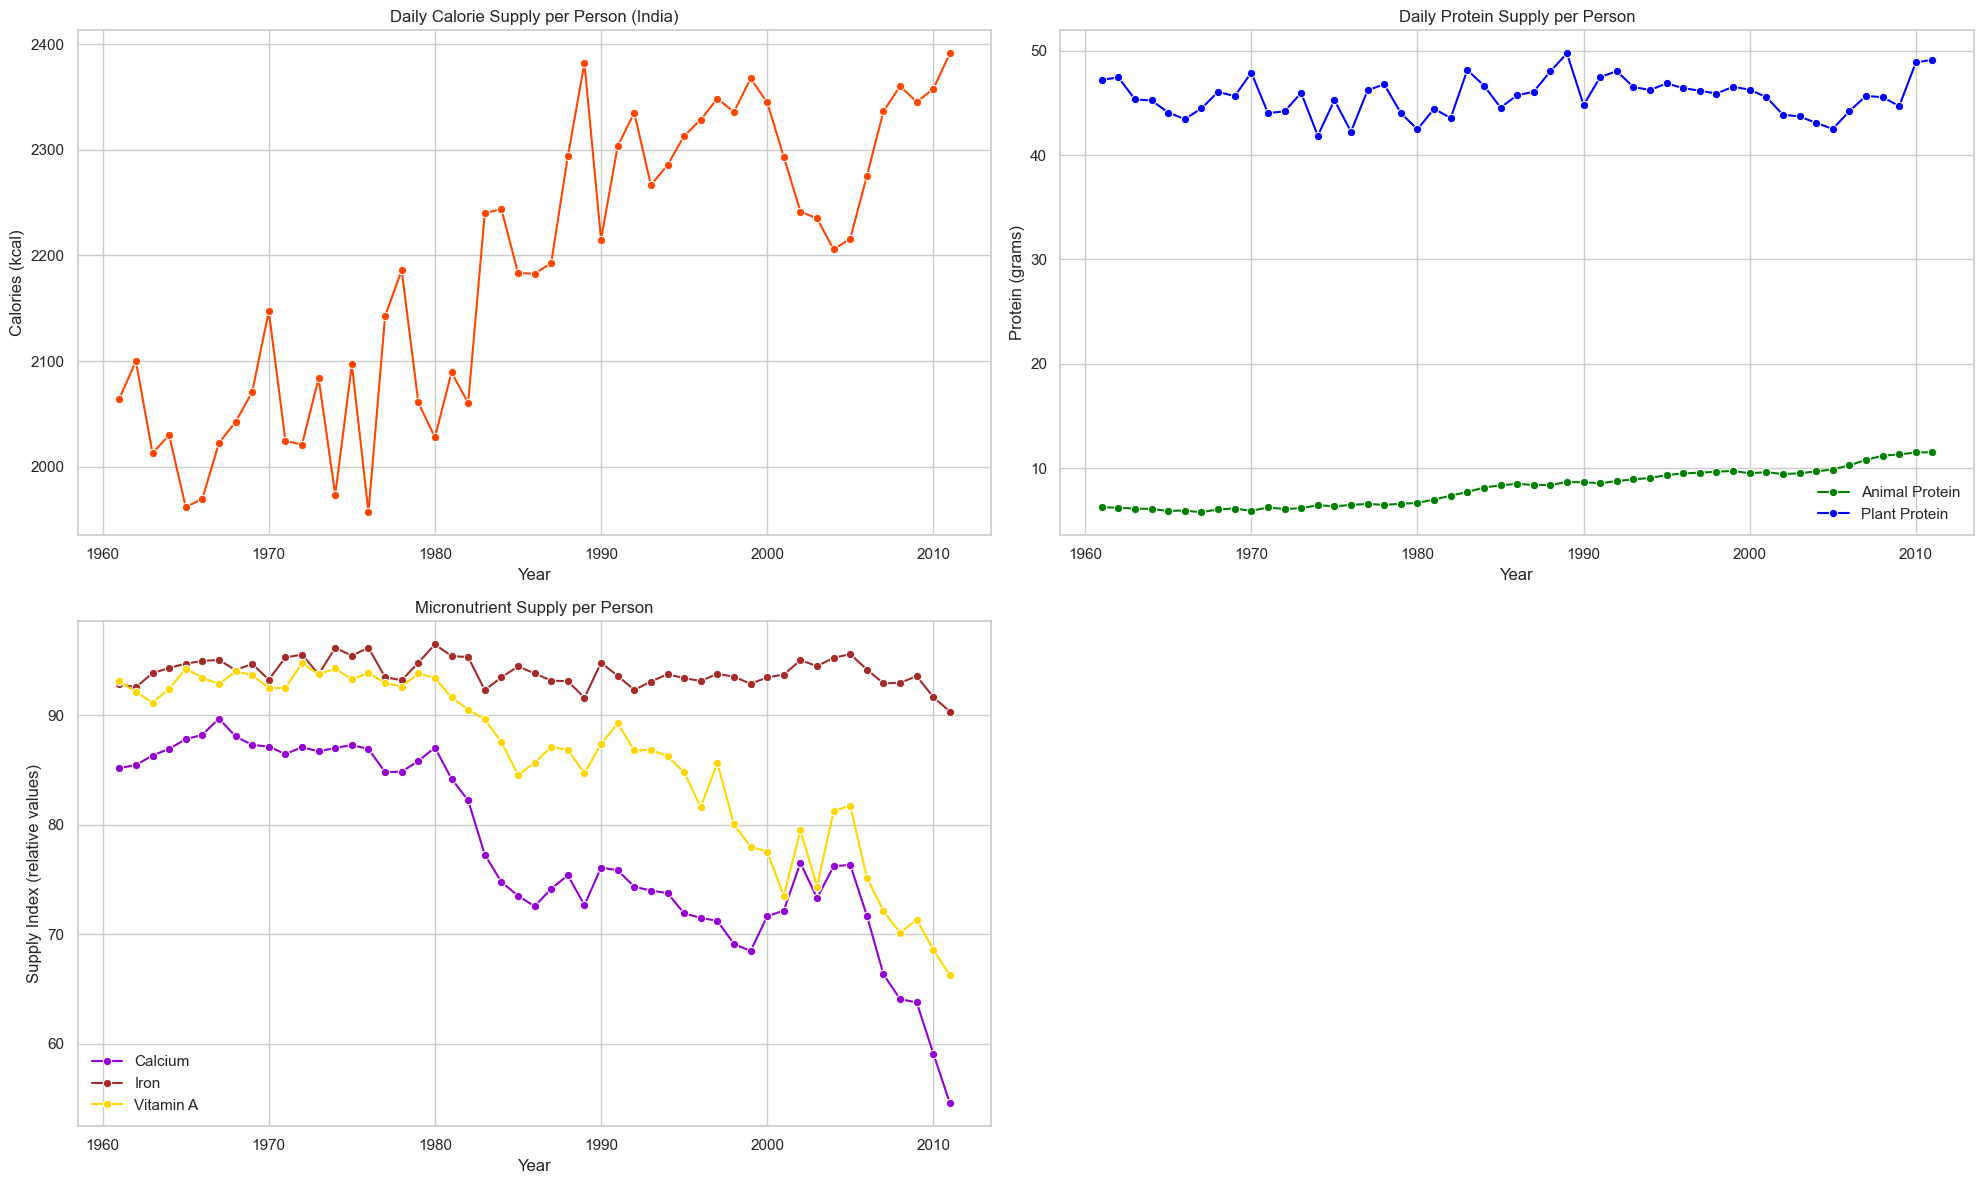

In [107]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# 1. Calories over time
plt.subplot(2, 2, 1)
sns.lineplot(data=final_df, x="Year", y="Calories_per_person", color="orangered", marker="o")
plt.title("Daily Calorie Supply per Person (India)")
plt.ylabel("Calories (kcal)")
plt.xlabel("Year")

# 2. Protein supply
plt.subplot(2, 2, 2)
sns.lineplot(data=final_df, x="Year", y="Protein_Animal", label="Animal Protein", color="green", marker="o")
sns.lineplot(data=final_df, x="Year", y="Protein_Plant", label="Plant Protein", color="blue", marker="o")
plt.title("Daily Protein Supply per Person")
plt.ylabel("Protein (grams)")
plt.xlabel("Year")
plt.legend()

# 3. Micronutrient supply
plt.subplot(2, 2, 3)
sns.lineplot(data=final_df, x="Year", y="Calcium", label="Calcium", color="darkviolet", marker="o")
sns.lineplot(data=final_df, x="Year", y="Iron", label="Iron", color="brown", marker="o")
sns.lineplot(data=final_df, x="Year", y="Vitamin A", label="Vitamin A", color="gold", marker="o")
plt.title("Micronutrient Supply per Person")
plt.ylabel("Supply Index (relative values)")
plt.xlabel("Year")
plt.legend()

# 4. Combined nutrient radar/overview (optional if asked later)

plt.tight_layout()
plt.show()


In [108]:
before_gr = final_df[final_df["Year"] < 1965]
after_gr = final_df[final_df["Year"] >= 1965]

# Calculate averages
avg_comparison = pd.DataFrame({
    "Calories_per_person": [before_gr["Calories_per_person"].mean(), after_gr["Calories_per_person"].mean()],
    "Protein_Animal": [before_gr["Protein_Animal"].mean(), after_gr["Protein_Animal"].mean()],
    "Protein_Plant": [before_gr["Protein_Plant"].mean(), after_gr["Protein_Plant"].mean()],
    "Calcium": [before_gr["Calcium"].mean(), after_gr["Calcium"].mean()],
    "Iron": [before_gr["Iron"].mean(), after_gr["Iron"].mean()],
    "Vitamin_A": [before_gr["Vitamin A"].mean(), after_gr["Vitamin A"].mean()]
}, index=["Before_GR", "After_GR"])

display(avg_comparison)


,Calories_per_person,Protein_Animal,Protein_Plant,Calcium,Iron,Vitamin_A
Before_GR,2051.757925,6.178277,46.300162,85.992455,93.412742,92.223198
After_GR,2199.058500,8.270923,45.519637,77.266303,94.004442,85.595546


In [109]:
change = ((avg_comparison.loc["After_GR"] - avg_comparison.loc["Before_GR"]) / avg_comparison.loc["Before_GR"]) * 100
print("Percentage Change After Green Revolution:")
print(change.round(2))


Percentage Change After Green Revolution:
Calories_per_person     7.18
Protein_Animal         33.87
Protein_Plant          -1.69
Calcium               -10.15
Iron                    0.63
Vitamin_A              -7.19
dtype: float64


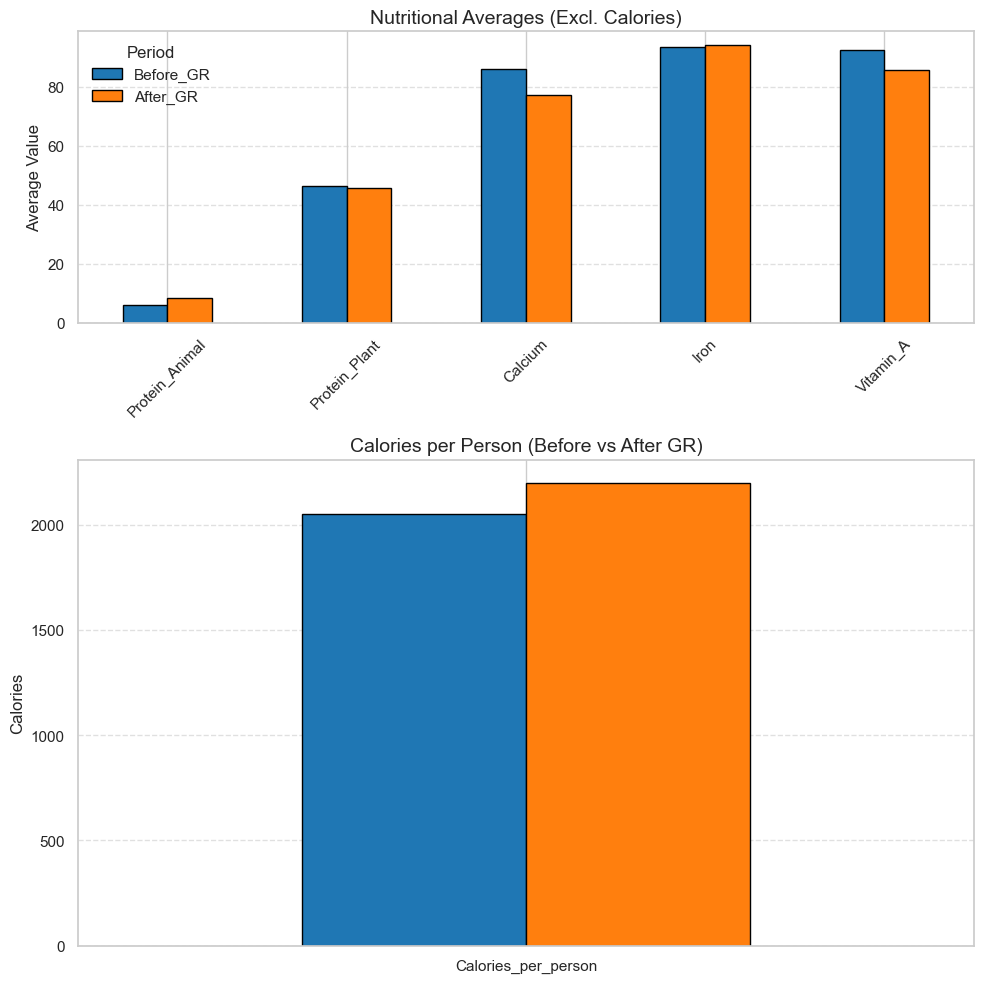

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# -----------------------------
# Step 1: Split data
# -----------------------------
calories_df = avg_comparison[['Calories_per_person']]
other_nutrients_df = avg_comparison.drop(columns=['Calories_per_person'])

# -----------------------------
# Step 2: Create subplots
# -----------------------------
fig, axes = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1.2, 2]})

# --- Plot 1: Other Nutrients ---
other_nutrients_df.T.plot(kind="bar", ax=axes[0], color=["#1f77b4", "#ff7f0e"], edgecolor='black')
axes[0].set_title("Nutritional Averages (Excl. Calories)", fontsize=14)
axes[0].set_ylabel("Average Value")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Period")
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Plot 2: Calories per Person ---
calories_df.T.plot(kind="bar", ax=axes[1], color=["#1f77b4", "#ff7f0e"], edgecolor='black', legend=False)
axes[1].set_title("Calories per Person (Before vs After GR)", fontsize=14)
axes[1].set_ylabel("Calories")
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Layout adjustment
plt.tight_layout()
plt.show()


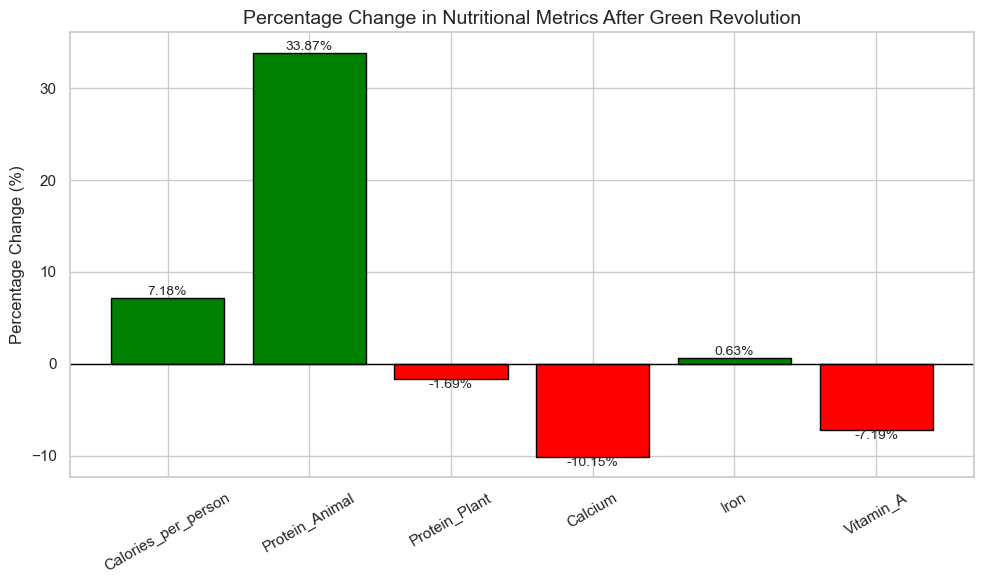

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Calculate percentage change (if not already done)
change = ((avg_comparison.loc["After_GR"] - avg_comparison.loc["Before_GR"]) / avg_comparison.loc["Before_GR"]) * 100
change = change.round(2)

# Color each bar green if positive, red if negative
colors = ['green' if val >= 0 else 'red' for val in change.values]

# Create figure
plt.figure(figsize=(10, 6))
bars = plt.bar(change.index, change.values, color=colors, edgecolor='black')

# Title and labels
plt.title("Percentage Change in Nutritional Metrics After Green Revolution", fontsize=14)
plt.ylabel("Percentage Change (%)")
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=30)

# Annotate each bar with the exact percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}%", 
             ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

# Layout
plt.tight_layout()
plt.show()


The analysis shows that the **Green Revolution improved food quantity but not necessarily food quality**:

- 📈 **Calories per person** increased by **7.18%**, meaning people had more energy intake.
- 🍗 **Animal-based protein** saw a big rise of **33.87%**, likely due to improved income and dietary diversification.
- 🌾 **Plant-based protein** slightly dropped by **1.69%**, possibly because crops like pulses were replaced by high-yield cereals.
- 🧂 **Micronutrient availability** had mixed outcomes:
  - 🦴 **Calcium** dropped by **10.15%**
  - 🧲 **Iron** remained mostly the same (**+0.63%**)
  - 👁️ **Vitamin A** fell by **7.19%**

> 🧠 **What this means:**  
> While people had **more food**, the **nutritional quality** didn’t improve equally.  
> This highlights that **just increasing food production isn’t enough** — we also need to focus on the **diversity and nutrient richness** of diets to ensure real progress in health and nutrition.

---

### 🧪 Question 5: Did Life Expectancy Increase Equally Across Socioeconomic Groups?

🎯 Objective

To investigate whether the improvements in life expectancy across Indian states from 1990 to 2022 were **distributed equally across regions with different socioeconomic statuses**. 

Although the Green Revolution began in the mid-1960s, its long-term effects on health and longevity may manifest in the decades that followed. By classifying states into **high** and **low socioeconomic groups** based on external indicators (like income, literacy, healthcare access), we analyze:

- Whether states with **lower socioeconomic status** saw slower improvements in life expectancy.
- If the **regional health disparities** widened or narrowed over time.
- How **equity in health outcomes** evolved in the decades following the Green Revolution.

This analysis provides insight into the **uneven reach of development and agricultural advancements**, especially their impact on population health.



### Loading the data into the data frame

In [124]:
df = pd.read_csv("Life Expectency/GDL-Life-expectancy-data.csv")
display(df.head())

,Country,Continent,ISO_Code,Level,GDLCODE,Region,1990,1991,1992,1993,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,India,Asia/Pacific,IND,Subnat,INDr136,Andaman and Nicobar Islands,74.46,74.97,75.47,75.51,...,76.34,76.44,76.49,76.45,75.91,75.27,74.59,73.79,70.73,71.26
1,India,Asia/Pacific,IND,Subnat,INDr101,Andhra Pradesh,61.16,61.58,62.00,62.17,...,69.05,69.62,70.15,70.59,70.94,71.18,71.38,70.61,67.69,68.19
2,India,Asia/Pacific,IND,Subnat,INDr125,Arunachal Pradesh,62.36,62.79,63.21,63.30,...,69.92,70.96,71.95,72.86,73.66,74.35,74.99,74.19,71.11,71.65
3,India,Asia/Pacific,IND,Subnat,INDr102,Assam,56.30,56.68,57.06,58.15,...,67.46,68.11,68.70,69.22,70.11,70.89,71.62,70.85,67.91,68.42
4,India,Asia/Pacific,IND,Subnat,INDr103,Bihar,56.93,57.33,57.71,58.18,...,67.27,67.95,68.58,69.13,69.08,68.92,68.72,67.98,65.16,65.65


### Filter for 4 Selected States

In [127]:
selected_states = ["Kerala", "Tamil Nadu", "Bihar", "Uttar Pradesh"]
df_selected = df[df["Region"].isin(selected_states)].copy()
df_selected.reset_index(drop=True, inplace=True)

df_selected[["Region"] + [str(year) for year in range(1990, 1995)]]


,Region,1990,1991,1992,1993,1994
0,Bihar,56.93,57.33,57.71,58.18,58.69
1,Kerala,68.63,69.11,69.57,69.99,70.46
2,Tamil Nadu,61.25,61.67,62.08,62.74,63.44
3,Uttar Pradesh,54.86,55.24,55.61,56.06,56.54


### Reshape Dataset 

In [128]:
df_melted = df_selected.melt(
    id_vars=["Region"],
    value_vars=[str(year) for year in range(1990, 2023)],
    var_name="Year",
    value_name="Life Expectancy"
)

df_melted["Year"] = df_melted["Year"].astype(int)
df_melted.head()


,Region,Year,Life Expectancy
0,Bihar,1990,56.93
1,Kerala,1990,68.63
2,Tamil Nadu,1990,61.25
3,Uttar Pradesh,1990,54.86
4,Bihar,1991,57.33


### Plot Life Expectancy Trends (1990–2022)

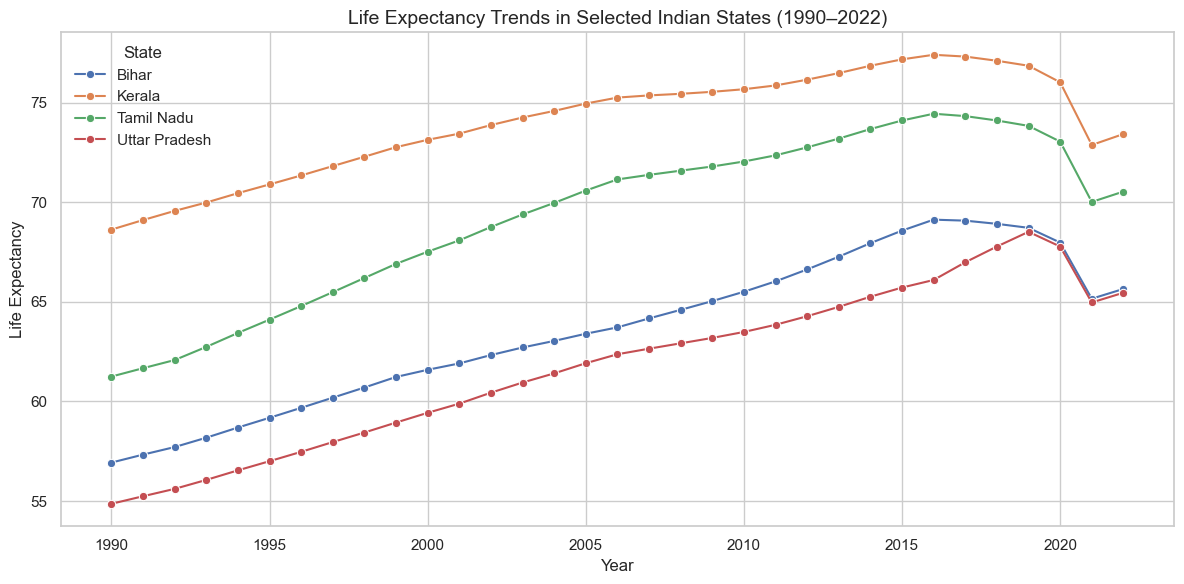

In [129]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="Year", y="Life Expectancy", hue="Region", marker="o")

plt.title("Life Expectancy Trends in Selected Indian States (1990–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(title="State")
plt.tight_layout()
plt.show()


### Avg life expectancy per state

In [130]:
df_avg = df_selected.set_index("Region")[[str(year) for year in range(1990, 2023)]].mean(axis=1)
df_avg = df_avg.reset_index()
df_avg.columns = ["State", "Average Life Expectancy (1990–2022)"]
df_avg.sort_values(by="Average Life Expectancy (1990–2022)", ascending=False)


,State,Average Life Expectancy (1990–2022)
1,Kerala,74.002424
2,Tamil Nadu,69.315758
0,Bihar,63.604242
3,Uttar Pradesh,61.764848


### Life Expectancy Improvement (1990 → 2022)

In [131]:
df_selected["Improvement"] = df_selected["2022"] - df_selected["1990"]
df_selected[["Region", "1990", "2022", "Improvement"]].sort_values(by="Improvement", ascending=False)


,Region,1990,2022,Improvement
3,Uttar Pradesh,54.86,65.46,10.60
2,Tamil Nadu,61.25,70.54,9.29
0,Bihar,56.93,65.65,8.72
1,Kerala,68.63,73.43,4.80


The analysis shows that the **Green Revolution had a stronger impact on life expectancy in less developed states**:

- 📍 **Uttar Pradesh** saw the **highest increase** in life expectancy: **+10.60 years**
- 🌾 **Bihar** also improved significantly: **+8.72 years**
- 🏥 **Tamil Nadu**, a relatively better-off state, gained **+9.29 years**
- 📘 **Kerala**, already having high life expectancy, gained only **+4.80 years**

> 🧠 **What this means:**  
> The Green Revolution led to **greater improvements** in **less developed states**, helping them **catch up** with better-off ones.  
> This suggests a **narrowing of health inequality**, rather than increasing disparity.  
> The benefits were **not equally distributed**, but they were **equity-enhancing** —  
> making the biggest difference where the **need was greatest**.

---
